#### **Task 6**: How many states cover 50% of US air traffic? 

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
data = pd.read_csv('data/Merged_Table_1.csv')
traffic = pd.read_csv('data/traff_flights.csv')

In [17]:
df = data.copy()
df.head(5)

,Unnamed: 0,index,fl_date,mkt_unique_carrier,mkt_carrier_fl_num,origin_city_name,dest_city_name,crs_dep_time,dep_delay,taxi_out,...,diverted,crs_elapsed_time,actual_elapsed_time,air_time,distance,Trip_count_PerDay,Trip_count_Permonth,Trip_count_PerYear,origin_city_condn,dest_city_condn
0,0,0,2018-01-01,WN,5705,"Tampa, FL","Albany, NY",15,28.0,12.0,...,0,160,153.0,134.0,1130,1.001351,30.875000,61.750000,low_rainny,sunny
1,1,1,2018-01-01,WN,988,"New Orleans, LA","Houston, TX",6,-2.0,9.0,...,0,75,69.0,57.0,302,17.332432,534.416667,1068.833333,cloundy,sunny
2,2,2,2018-01-01,WN,1236,"New Orleans, LA","Orlando, FL",5,-1.0,8.0,...,0,100,86.0,70.0,551,5.255405,162.041667,324.083333,cloundy,low_rainny
3,3,3,2018-01-01,WN,233,"New Orleans, LA","Oakland, CA",15,16.0,8.0,...,0,290,283.0,271.0,1903,0.959459,29.583333,59.166667,cloundy,sunny
4,4,4,2018-01-01,WN,446,"New Orleans, LA","St. Louis, MO",18,3.0,6.0,...,0,105,125.0,83.0,604,1.981081,61.083333,122.166667,cloundy,sunny


In [18]:
df['States'] = df['origin_city_name'].str.slice(-2)

In [19]:
df.head(5)

,Unnamed: 0,index,fl_date,mkt_unique_carrier,mkt_carrier_fl_num,origin_city_name,dest_city_name,crs_dep_time,dep_delay,taxi_out,...,crs_elapsed_time,actual_elapsed_time,air_time,distance,Trip_count_PerDay,Trip_count_Permonth,Trip_count_PerYear,origin_city_condn,dest_city_condn,States
0,0,0,2018-01-01,WN,5705,"Tampa, FL","Albany, NY",15,28.0,12.0,...,160,153.0,134.0,1130,1.001351,30.875000,61.750000,low_rainny,sunny,FL
1,1,1,2018-01-01,WN,988,"New Orleans, LA","Houston, TX",6,-2.0,9.0,...,75,69.0,57.0,302,17.332432,534.416667,1068.833333,cloundy,sunny,LA
2,2,2,2018-01-01,WN,1236,"New Orleans, LA","Orlando, FL",5,-1.0,8.0,...,100,86.0,70.0,551,5.255405,162.041667,324.083333,cloundy,low_rainny,LA
3,3,3,2018-01-01,WN,233,"New Orleans, LA","Oakland, CA",15,16.0,8.0,...,290,283.0,271.0,1903,0.959459,29.583333,59.166667,cloundy,sunny,LA
4,4,4,2018-01-01,WN,446,"New Orleans, LA","St. Louis, MO",18,3.0,6.0,...,105,125.0,83.0,604,1.981081,61.083333,122.166667,cloundy,sunny,LA


In [20]:
df_states = df[['fl_date','States', 'Trip_count_PerYear']]
df_states = df_states.groupby(['States']).sum()

In [21]:
df_states.head(5)

,Trip_count_PerYear
States,
AK,2.941008e+04
AL,2.788025e+04
AR,1.601358e+04
AZ,1.298611e+05
CA,1.063814e+06


In [22]:
df_states['traffic_cover'] = (df_states['Trip_count_PerYear']/df_states['Trip_count_PerYear'].sum())*100

In [23]:
df_states = df_states.reset_index()
df_states = df_states.sort_values('traffic_cover')

In [24]:
df_states.head(5)

,States,Trip_count_PerYear,traffic_cover
43,TT,362.166667,0.004203
52,WY,454.750000,0.005277
47,VI,526.750000,0.006113
15,KS,4455.250000,0.051701
29,NH,5109.333333,0.059292


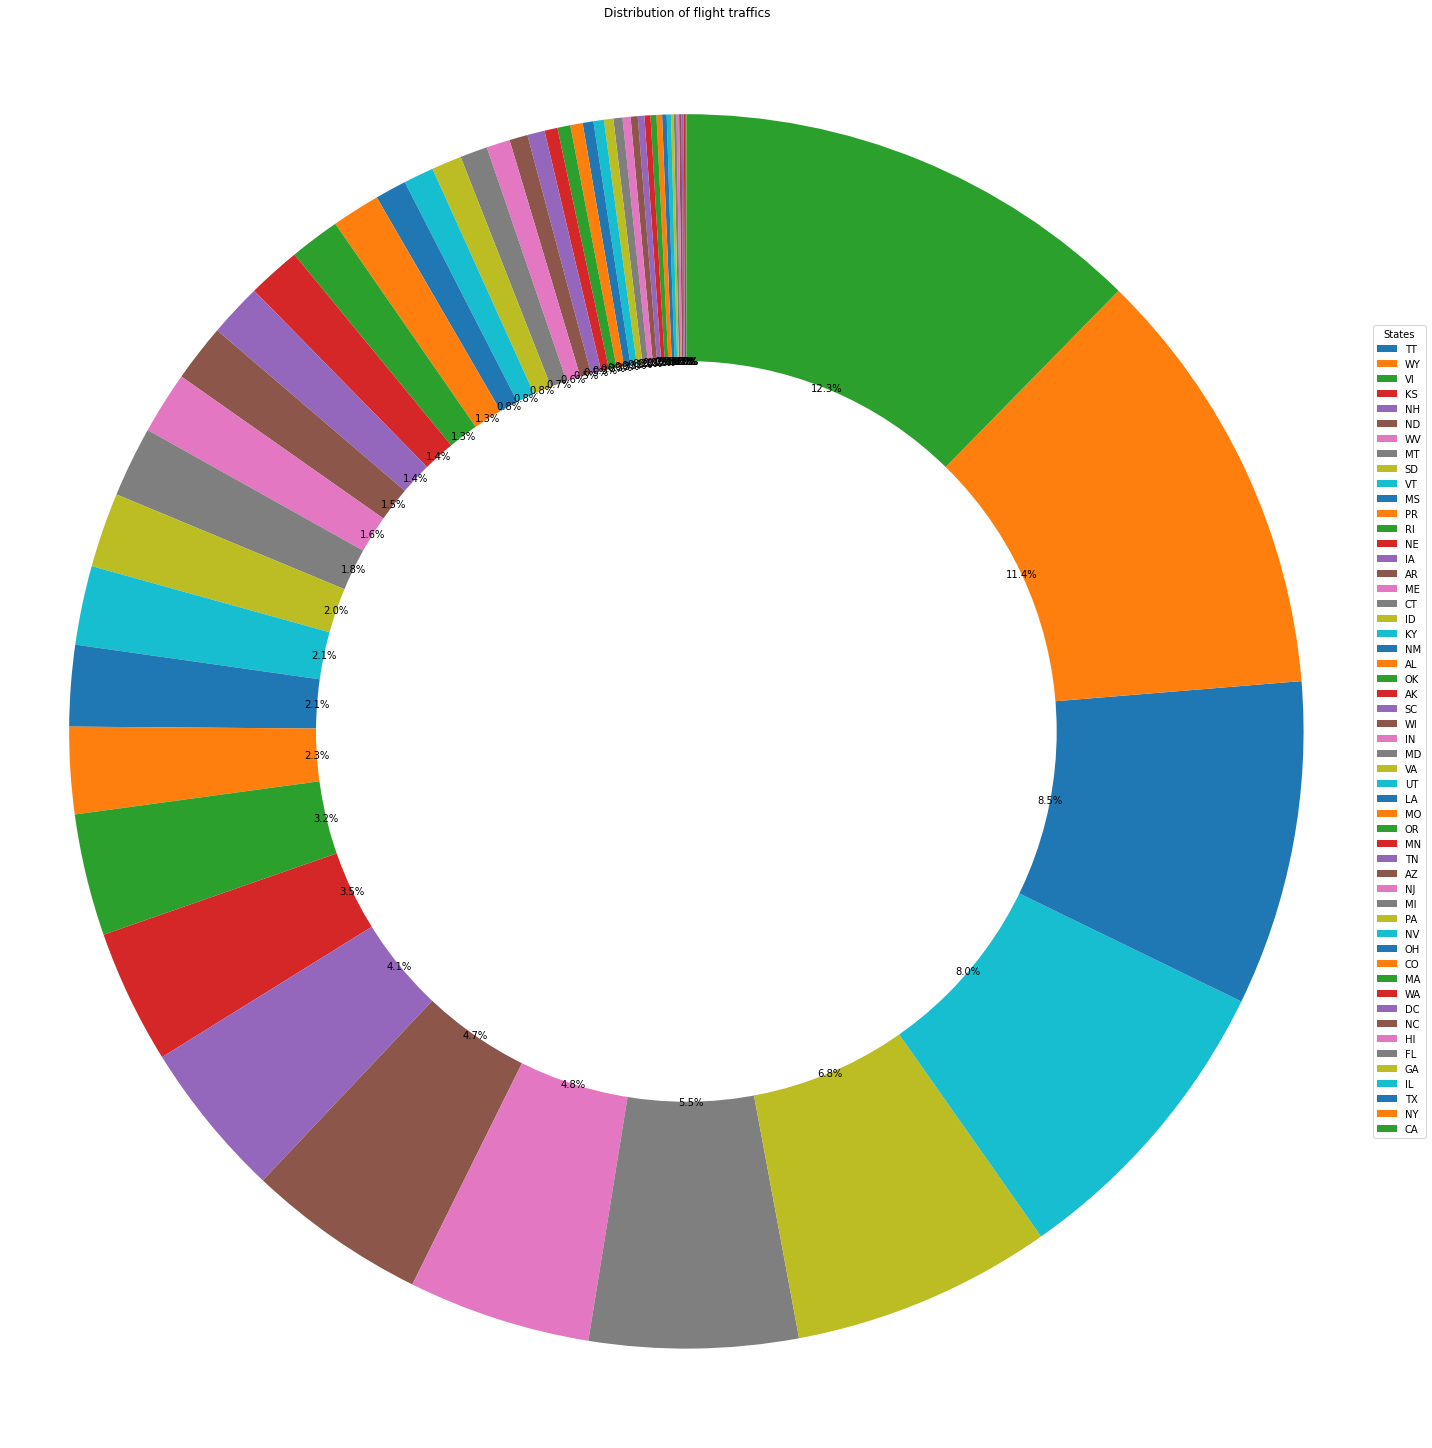

In [28]:
# Pie chart
labels = df_states['States']
sizes = df_states['traffic_cover']

fig1, ax1 = plt.subplots(figsize=(20, 20))
wedges, texts, autotexts = ax1.pie(sizes, autopct='%1.1f%%', startangle=90)

#draw circle, make center white
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.legend(wedges, labels,
          title="States",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()

plt.setp(texts, size=10, weight="bold")

ax1.set_title("Distribution of flight traffics")
"""
The circle showing distribution of flight traffics covered by each States
"""
plt.show()